## VWAP Trading Strategy

### 1. Identify the Trend
- If the **price is above VWAP**, the stock is in an **uptrend**.
- If the **price is below VWAP**, the stock is in a **downtrend**.

### 2. Look for a Pullback to VWAP
- When the price **pulls back to VWAP in an uptrend**, consider entering a **long (buy) position**.
- When the price **pulls back to VWAP in a downtrend**, consider entering a **short (sell) position**.

### 3. Confirm with Volume
- If the stock **bounces off VWAP with increasing volume**, it’s a good sign of a strong move.

### 4. Set Stop-Loss & Target
- Place a **stop-loss** slightly **below VWAP (for long trades)** or **above VWAP (for short trades)**.
- Aim for a **1.5x to 2x reward-to-risk ratio**.

# How MACD Works

### 1. Short-term vs. Long-term Averages:
- The **MACD** uses two **Exponential Moving Averages (EMAs)**:
  - **12-day EMA (short-term)**: Responds quickly to recent price changes.
  - **26-day EMA (long-term)**: Slower to react to price changes.

### 2. Difference Between the Two:
- The **MACD line** is simply the difference between the **12-day** and **26-day** EMAs.
- If the **12-day EMA** is above the **26-day EMA**, the MACD will be **positive**, indicating **bullish momentum** (uptrend).
- If the **12-day EMA** is below the **26-day EMA**, the MACD will be **negative**, indicating **bearish momentum** (downtrend).

### 3. Signal Line:
- The **Signal Line** is a **9-day EMA** of the MACD line.
- When the **MACD line** crosses **above** the **Signal Line**, it’s a signal to **buy** (bullish).
- When the **MACD line** crosses **below** the **Signal Line**, it’s a signal to **sell** (bearish).

### 4. Histogram:
- The **Histogram** represents the difference between the **MACD line** and the **Signal Line**.
- When the **MACD line** is **above** the Signal Line, the histogram is **positive** (green bars).
- When the **MACD line** is **below** the Signal Line, the histogram is **negative** (red bars).

### In Summary:
- **MACD Line**: Difference between **short-term (12-day)** and **long-term (26-day)** EMAs.
- **Signal Line**: A smoother line (**9-day EMA**) that helps confirm signals.
- **Histogram**: Shows how far apart the MACD and Signal lines are.

[*********************100%***********************]  1 of 1 completed
/Users/mmsh/.pyenv/versions/3.11.6/lib/python3.11/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


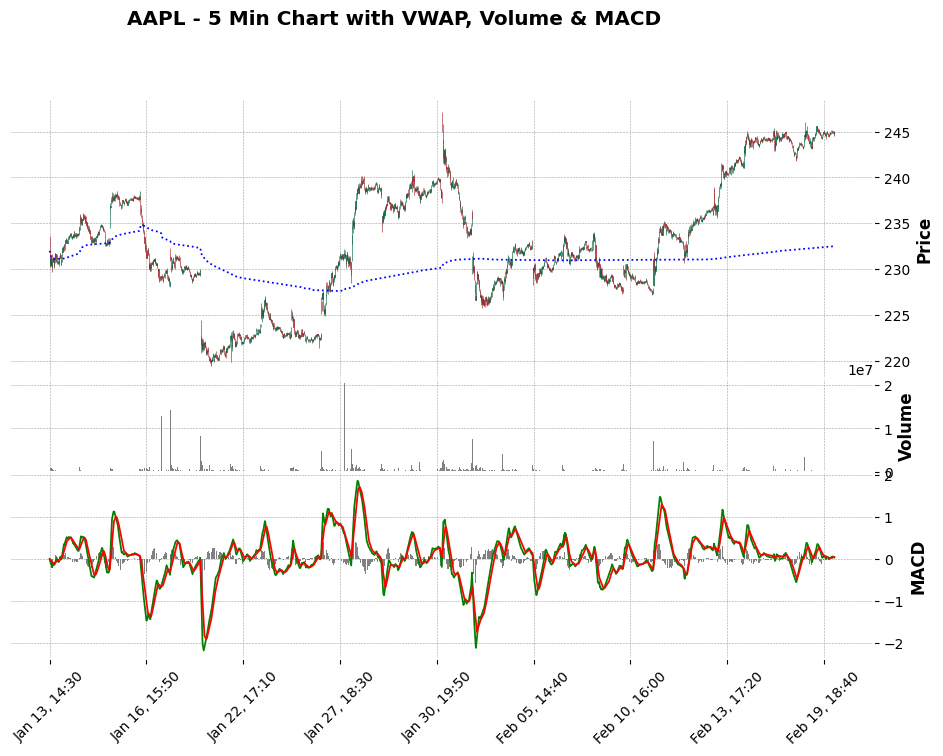

In [56]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

# Download historical 5-minute data for a stock (e.g., AAPL)
ticker ="AAPL"
df = yf.download(ticker, interval="5m", period="26d")

# Ensure columns are properly named
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate VWAP
df["Typical Price"] = (df["High"] + df["Low"] + df["Close"]) / 3
df["Cumulative TP*Volume"] = (df["Typical Price"] * df["Volume"]).cumsum()
df["Cumulative Volume"] = df["Volume"].cumsum()
df["VWAP"] = df["Cumulative TP*Volume"] / df["Cumulative Volume"]

# Calculate MACD
df["12 EMA"] = df["Close"].ewm(span=12, adjust=False).mean()
df["26 EMA"] = df["Close"].ewm(span=26, adjust=False).mean()
df["MACD"] = df["12 EMA"] - df["26 EMA"]
df["Signal Line"] = df["MACD"].ewm(span=9, adjust=False).mean()
df["Histogram"] = df["MACD"] - df["Signal Line"]

# ---- ADDPLOTS ---- #
# VWAP on Main Chart (Panel 0)
ap_vwap = mpf.make_addplot(df["VWAP"], color="blue", linestyle="dotted", panel=0)

# Volume on a Separate Panel (Panel 1)
ap_volume = mpf.make_addplot(df["Volume"], panel=1, type="bar", color="gray", secondary_y=False, ylabel="Volume")

# MACD on Separate Panel (Panel 2)
ap_macd = mpf.make_addplot(df["MACD"], panel=2, color="green", secondary_y=False, ylabel="MACD")
ap_signal = mpf.make_addplot(df["Signal Line"], panel=2, color="red", secondary_y=False)
ap_histogram = mpf.make_addplot(df["Histogram"], panel=2, type="bar", color="gray", secondary_y=False)

# ---- PLOT ---- #
mpf.plot(df, type="candle", style="charles",
         addplot=[ap_vwap, ap_volume, ap_macd, ap_signal, ap_histogram],
         title=f"{ticker} - 5 Min Chart with VWAP, Volume & MACD",
         figsize=(12,8), panel_ratios=(3,1,2))

[*********************100%***********************]  1 of 1 completed
/Users/mmsh/.pyenv/versions/3.11.6/lib/python3.11/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


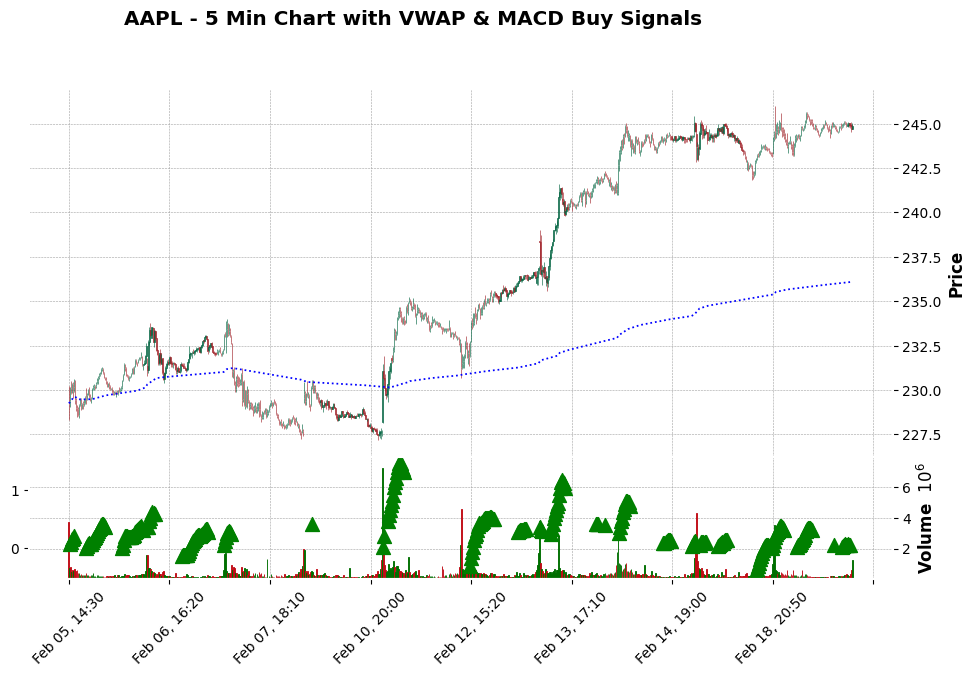

In [52]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf

# Download historical 5-minute data for a stock (e.g., AAPL)
ticker = "AAPL"
df = yf.download(ticker, interval="5m", period="10d")

# Ensure columns are properly named
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate VWAP
df["Typical Price"] = (df["High"] + df["Low"] + df["Close"]) / 3
df["Cumulative TP*Volume"] = (df["Typical Price"] * df["Volume"]).cumsum()
df["Cumulative Volume"] = df["Volume"].cumsum()
df["VWAP"] = df["Cumulative TP*Volume"] / df["Cumulative Volume"]

# Calculate MACD
df["12 EMA"] = df["Close"].ewm(span=12, adjust=False).mean()
df["26 EMA"] = df["Close"].ewm(span=26, adjust=False).mean()
df["MACD"] = df["12 EMA"] - df["26 EMA"]
df["Signal Line"] = df["MACD"].ewm(span=9, adjust=False).mean()
df["Histogram"] = df["MACD"] - df["Signal Line"]

# Identify Buy Signals (MACD crosses above Signal Line & Price above VWAP)
df["Buy Signal"] = (df["MACD"] > df["Signal Line"]) & (df["Close"] > df["VWAP"])

# Extract Buy Signal Points (Ensure alignment with df)
buy_signals = df[df["Buy Signal"]].reindex(df.index)

# ---- ADDPLOTS ---- #
# VWAP on Main Chart
ap_vwap = mpf.make_addplot(df["VWAP"], color="blue", linestyle="dotted", panel=0)

# MACD and Signal Line on Separate Panel
ap_macd = mpf.make_addplot(df["MACD"], panel=1, color="green", secondary_y=False)  # Green curve
ap_signal = mpf.make_addplot(df["Signal Line"], panel=1, color="red", secondary_y=False)  # Red curve
ap_histogram = mpf.make_addplot(df["Histogram"], panel=1, type="bar", color="gray", secondary_y=False)  # Gray bars

# Buy Markers on MACD Line
ap_buy_markers = mpf.make_addplot(buy_signals["MACD"], type="scatter", marker="^", color="green", markersize=100, panel=1)

# ---- PLOT ---- #
mpf.plot(df, type="candle", style="charles", volume=True,
         addplot=[ap_vwap, ap_macd, ap_signal, ap_histogram, ap_buy_markers],
         title=f"{ticker} - 5 Min Chart with VWAP & MACD Buy Signals",
         figsize=(12,7), panel_ratios=(3,1))  # Adjust panel size for MACD